In [1]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clean display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
#  Load Auto MPG dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Column names from auto-mpg.names
columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

# Load dataset
df = pd.read_csv(url, names=columns, na_values='?', delim_whitespace=True)

# Display first few rows
df.head()


C:\Users\htete\AppData\Local\Temp\ipykernel_10568\54497405.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=columns, na_values='?', delim_whitespace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [5]:
# Convert horsepower to numeric (already handled above, but double-check)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Confirm no remaining '?'
print(df['horsepower'].isna().sum(), "missing values in horsepower")

# Fill missing horsepower with the median value (or drop if few)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Convert 'origin' from numbers to strings
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Asia', 3: 'Europe'})

# Double check cleaned data
df.head()


6 missing values in horsepower


C:\Users\htete\AppData\Local\Temp\ipykernel_10568\1897965612.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


C:\Users\htete\AppData\Local\Temp\ipykernel_10568\668283675.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cylinders', data=df, palette='pastel')


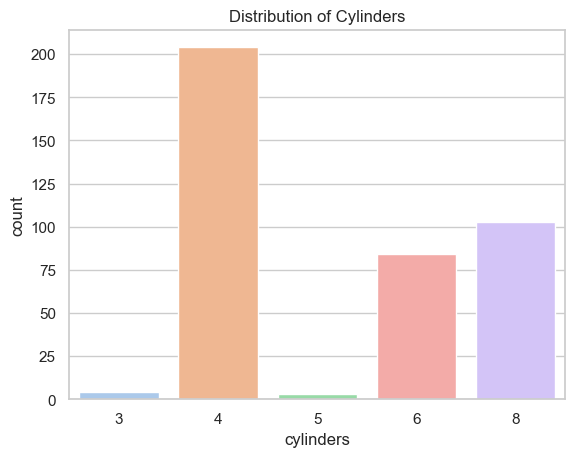

In [7]:
sns.countplot(x='cylinders', data=df, palette='pastel')
plt.title('Distribution of Cylinders')
plt.show()


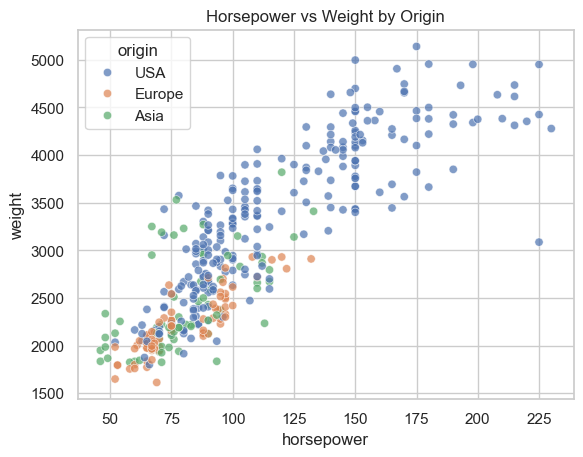

In [9]:
sns.scatterplot(data=df, x='horsepower', y='weight', hue='origin', alpha=0.7)
plt.title('Horsepower vs Weight by Origin')
plt.show()


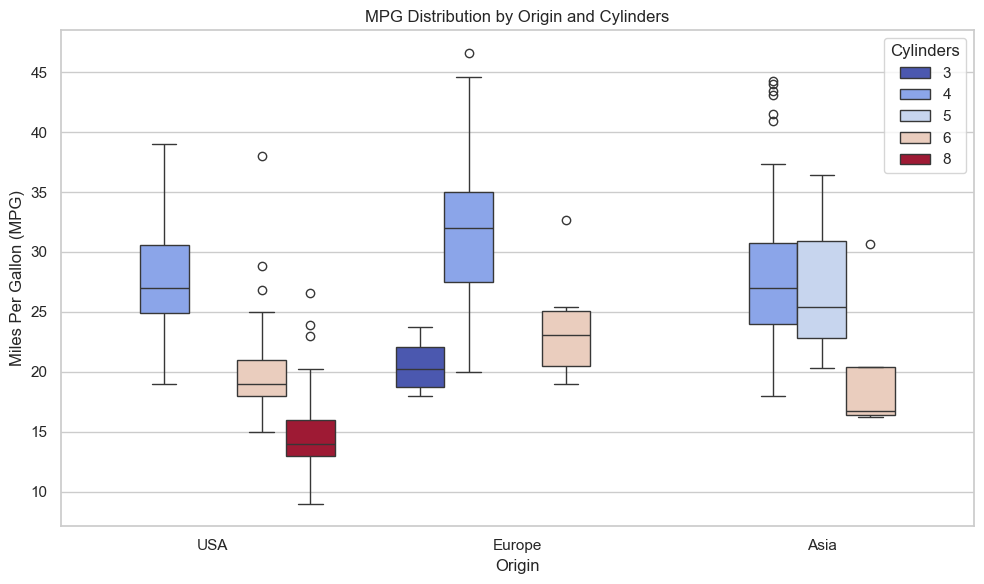

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=df, palette='coolwarm')
plt.title('MPG Distribution by Origin and Cylinders')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Cylinders')
plt.tight_layout()
plt.show()


In [11]:
df.to_csv("auto_mpg_cleaned.csv", index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!
